In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
from scipy import stats

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
list(session.query(Measurement).first().__dict__.keys())[1:]

['date', 'id', 'tobs', 'prcp', 'station']

In [11]:
list(session.query(Station).first().__dict__.keys())[1:]

['id', 'name', 'longitude', 'latitude', 'station', 'elevation']

# Exploratory Climate Analysis

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
last_date = session.query(Measurement.date).\
            order_by(Measurement.date.desc()).first()
year_ago = dt.datetime.strptime(last_date[0], '%Y-%m-%d')\
            .date() - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
prcps = session.query(Measurement.date, Measurement.prcp).\
            filter(Measurement.date >= year_ago).\
            order_by(Measurement.date).all()

In [13]:
prcps

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [14]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(prcps, columns=['Date', 'Precipitation'])
df.set_index('Date',inplace=True)
df.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


In [15]:
df.index

Index(['2016-08-23', '2016-08-23', '2016-08-23', '2016-08-23', '2016-08-23',
       '2016-08-23', '2016-08-23', '2016-08-24', '2016-08-24', '2016-08-24',
       ...
       '2017-08-21', '2017-08-21', '2017-08-21', '2017-08-22', '2017-08-22',
       '2017-08-22', '2017-08-23', '2017-08-23', '2017-08-23', '2017-08-23'],
      dtype='object', name='Date', length=2230)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2230 entries, 2016-08-23 to 2017-08-23
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Precipitation  2021 non-null   float64
dtypes: float64(1)
memory usage: 34.8+ KB


In [17]:
df.isnull().sum()

Precipitation    209
dtype: int64

In [18]:
df.dropna(inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2021 entries, 2016-08-23 to 2017-08-23
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Precipitation  2021 non-null   float64
dtypes: float64(1)
memory usage: 31.6+ KB


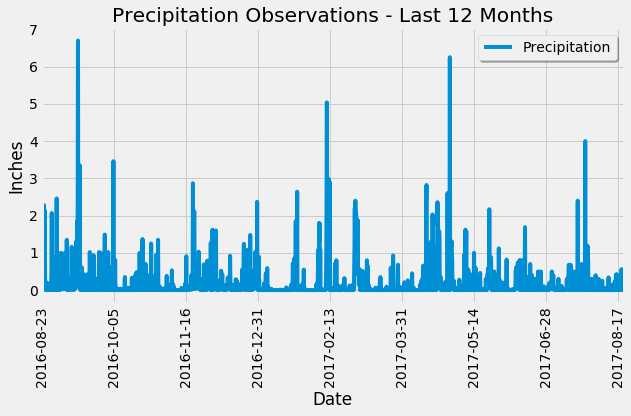

In [20]:
# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots(figsize=(9, 6))
df.plot(ax=ax, rot=90)

plt.xlabel('Date')
plt.ylabel('Inches')
plt.title('Precipitation Observations - Last 12 Months')
plt.legend(fancybox=True, shadow=True)

ax.set_xlim(0,len(df))

plt.tight_layout()
plt.show()

In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [22]:
# Design a query to show how many stations are available in this dataset?
num_st = session.query(Measurement).group_by(Measurement.station).count()
print('='*22)
print(f"Number of Stations: {num_st}")
print('='*22)

Number of Stations: 9


In [23]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
pd.DataFrame(session.query(Measurement.station, func.count('*')).\
        group_by(Measurement.station).\
        order_by(func.count('*').desc()).all(),
        columns=['Station ID', 'Count'])

,Station ID,Count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [24]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
ma_station = 'USC00519281'
temps = [func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.round(func.avg(Measurement.tobs),1)]

result = session.query(*temps).filter(Measurement.station == ma_station).all()

tmin, tmax, tavg = *result[0],

print('='*26)
print(f"Lowest Temperature: {tmin} \
\nHighest Temperature: {tmax} \
\nAverage Temperature: {tavg}")  
print('='*26)

Lowest Temperature: 54.0 
Highest Temperature: 85.0 
Average Temperature: 71.7


In [25]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
t_station = session.query(Measurement.station, func.count(Measurement.tobs)).\
        group_by(Measurement.station).\
        order_by(func.count(Measurement.tobs).desc()).first()[0]

temps = session.query(Measurement.date, Measurement.tobs).\
            filter(Measurement.date >= year_ago).\
            filter(Measurement.station == t_station).\
            order_by(Measurement.date).all()

temps

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

In [26]:
# Save the query results as a Pandas DataFrame and plot a histogram
df = pd.DataFrame(temps, columns=['Date', 'Temperature'])
df.head()

,Date,Temperature
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0


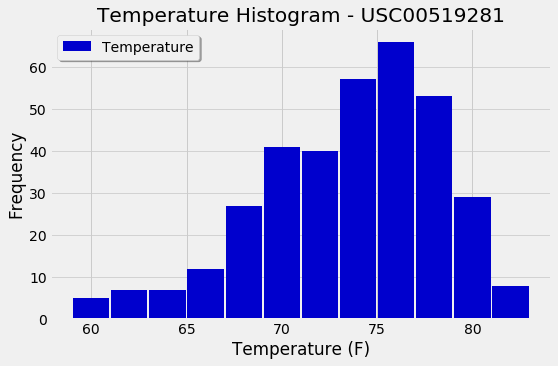

In [27]:
# Generate histogram
fig, ax = plt.subplots(figsize=(8, 5))
df['Temperature'].plot.hist(bins=12,
                                color='mediumblue',
                                alpha=1,
                                legend=True,
                                rwidth=0.95,
                                ax=ax)                                       

# Set textual properties
plt.title('Temperature Histogram - USC00519281')
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')

plt.legend(fancybox=True, shadow=True)

# set grid for y axis
ax.set_axisbelow(True)
ax.grid(axis='y', alpha=0.8)

plt.show()

# Bonus Challenge Assignment

## Temperature Analysis I

In [28]:
# Calculate average temperature in June at all stations across all available years in the dataset
month = '06'
tobs_06 = session.query(Measurement.tobs).filter(func.strftime("%m", Measurement.date) == month).all()
len(tobs_06)

1700

In [29]:
# Calculate average temperature in December at all stations across all available years in the dataset
month = '12'
tobs_12 = session.query(Measurement.tobs).filter(func.strftime("%m", Measurement.date) == month).all()
len(tobs_12)

1517

In [30]:
# Convert temperatures to falttened list
tobs_06_list = np.ravel(tobs_06).tolist()
tobs_12_list = np.ravel(tobs_12).tolist()

In [31]:
# Average temperature for June
print('='*50)
print(f"Average Temperature in June: {np.mean(tobs_06)}")  
print('='*50)

Average Temperature in June: 74.94411764705882


In [32]:
# Average temperature for December
print('='*50)
print(f"Average Temperature in December: {np.mean(tobs_12)}")  
print('='*50)

Average Temperature in December: 71.04152933421226


The average temperature in June is approximately 4F higher than in December.

There are two different groups of observations. Because stations are not measuring exactly every day two groups have different sizes. Therefore the unpaired t-test is appropriate.

In [33]:
# Unpaired (independent) t-test
t, p = stats.ttest_ind(tobs_06_list, tobs_12_list)
print(F"t-statistic: \t{round(t,4)}\np-value: \t{round(p,14)}")

t-statistic: 	31.6037
p-value: 	0.0


t-test returns a very small p-value that has been rounded down to zero. This indicates that the difference between the two means is statistically significant.

## Temperature Analysis II

In [34]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [35]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

# My trip start date 2017-10-9 and end date 2017-10-30
start_date = '2016-10-09'
end_date = '2016-10-30'

calc_ts = calc_temps(start_date, end_date)

tmin, tave, tmax = *calc_ts[0],

print('='*26)
print(f"Lowest Temperature: {tmin} \
\nAverage Temperature: {round(tave,2)} \
\nHighest Temperature: {tmax}")
print('='*26)

Lowest Temperature: 68.0 
Average Temperature: 77.01 
Highest Temperature: 81.0


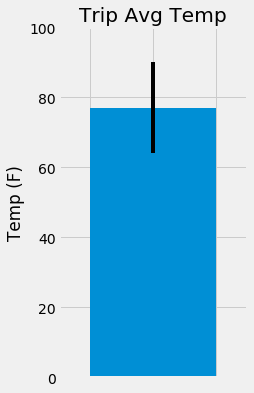

In [36]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

fig, ax = plt.subplots(figsize=(3, 6))

ax.bar(height=tave, x=0, width=1, yerr=(tmax-tmin))
plt.ylabel('Temp (F)')
plt.xlim(-0.75,0.75)
plt.ylim(0,100)
plt.title('Trip Avg Temp')

ax.xaxis.set_major_formatter(plt.NullFormatter())
plt.show()

## Daily Temperature Average

In [37]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
stat_sel = [Station.name, Station.latitude, 
            Station.longitude, Station.elevation]

rain = session.query(func.round(func.sum(Measurement.prcp),2), *stat_sel).\
            filter(Measurement.station == Station.station).\
            filter(Measurement.date >= start_date).\
            filter(Measurement.date <= end_date).\
            group_by(Measurement.station).\
            order_by(func.sum(Measurement.prcp).desc()).all()

rain_df = pd.DataFrame(rain,columns=['Precipitation', 'Station Name',
                                    'Latitude', 'Longitude', 'Elevation'])
rain_df

,Precipitation,Station Name,Latitude,Longitude,Elevation
0,8.24,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
1,1.39,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
2,0.83,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,0.80,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
4,0.60,"PEARL CITY, HI US",21.39340,-157.97510,11.9
5,0.49,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
6,0.43,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5


In [38]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [39]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = '2017-10-09'
end_date = '2017-10-30'
start_dt = dt.datetime.strptime(start_date, '%Y-%m-%d').date()
end_dt = dt.datetime.strptime(end_date, '%Y-%m-%d').date()

# Use the start and end date to create a range of dates
trip_dates = [(start_dt + dt.timedelta(n))
         for n in range((end_dt - start_dt).days + 1)]

# Strip off the year and save a list of %m-%d strings
md = [td.strftime("%m-%d") for td in trip_dates]

# Loop through the list of %m-%d strings and calculate the normals for each date
normals = [daily_normals(d)[0] for d in md]
normals[:5]

[(69.0, 76.11363636363636, 84.0),
 (69.0, 75.85416666666667, 83.0),
 (69.0, 76.57142857142857, 84.0),
 (65.0, 75.75510204081633, 82.0),
 (65.0, 75.98039215686275, 84.0)]

In [40]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
df = pd.DataFrame(normals, columns=['tmin', 'tavg', 'tmax'])
df['date'] = trip_dates
df.set_index('date', inplace=True)
df.head()

,tmin,tavg,tmax
date,,,
2017-10-09,69.0,76.113636,84.0
2017-10-10,69.0,75.854167,83.0
2017-10-11,69.0,76.571429,84.0
2017-10-12,65.0,75.755102,82.0
2017-10-13,65.0,75.980392,84.0


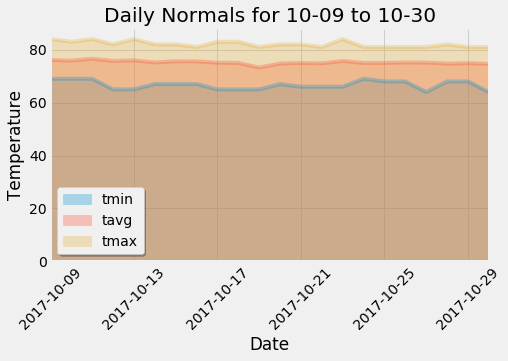

In [41]:
# Plot the daily normals as an area plot with `stacked=False`
fig, ax = plt.subplots(figsize=(7, 4))

df.plot(kind='area', stacked=False, rot=45, alpha=0.3, ax=ax)

# Set textual properties
plt.title('Daily Normals for 10-09 to 10-30')
plt.xlabel('Date')
plt.ylabel('Temperature')
ax.set_xlim(df.index[0], df.index[-1])
ax.xaxis_date()
plt.legend(fancybox=True, shadow=True)

#plt.tight_layout()
plt.show()